# Titanic Survival Analysis  
## Exploratory Data Analysis (EDA)

This notebook explores the Titanic dataset to understand which factors influenced passenger survival.
The analysis includes data inspection, univariate and multivariate visualizations, and key insights.


In [2]:
## 1. Setup and Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


## 2. Load Dataset

In [3]:
df = pd.read_csv('../data/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Dataset Overview

In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Target Variable Analysis (Survival)

In [8]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

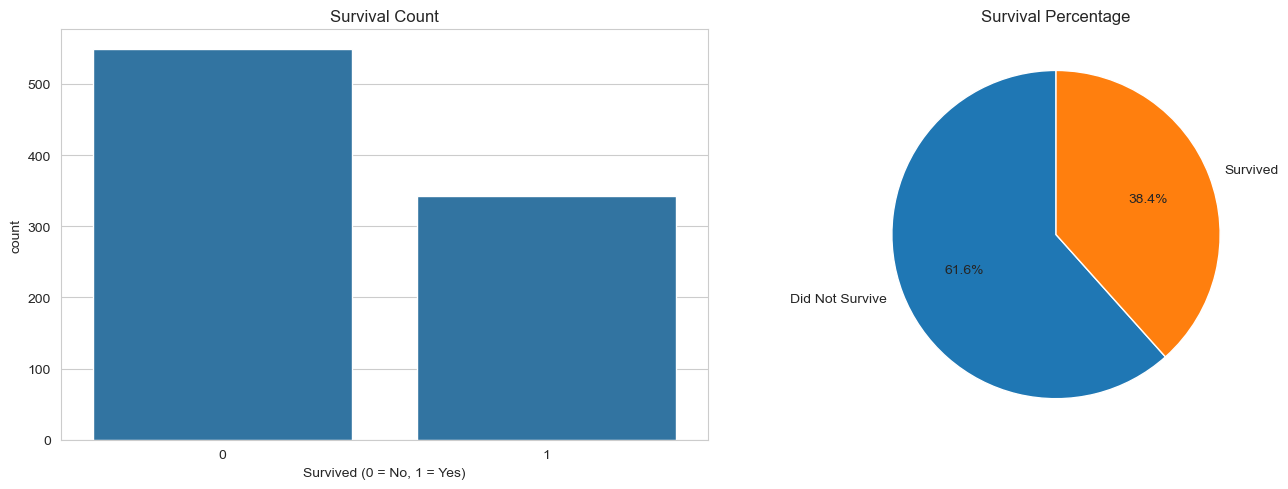

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='survived', ax=axes[0])
axes[0].set_title('Survival Count')
axes[0].set_xlabel('Survived (0 = No, 1 = Yes)')

survival_counts = df['survived'].value_counts()
axes[1].pie(
    survival_counts,
    labels=['Did Not Survive', 'Survived'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title('Survival Percentage')

plt.tight_layout()
plt.show()


## 5. Feature Analysis

### 5.1 Survival by Gender

In [11]:
pd.crosstab(df['sex'], df['survived'], normalize='index') * 100

survived,0,1
sex,,
female,25.796178,74.203822
male,81.109185,18.890815


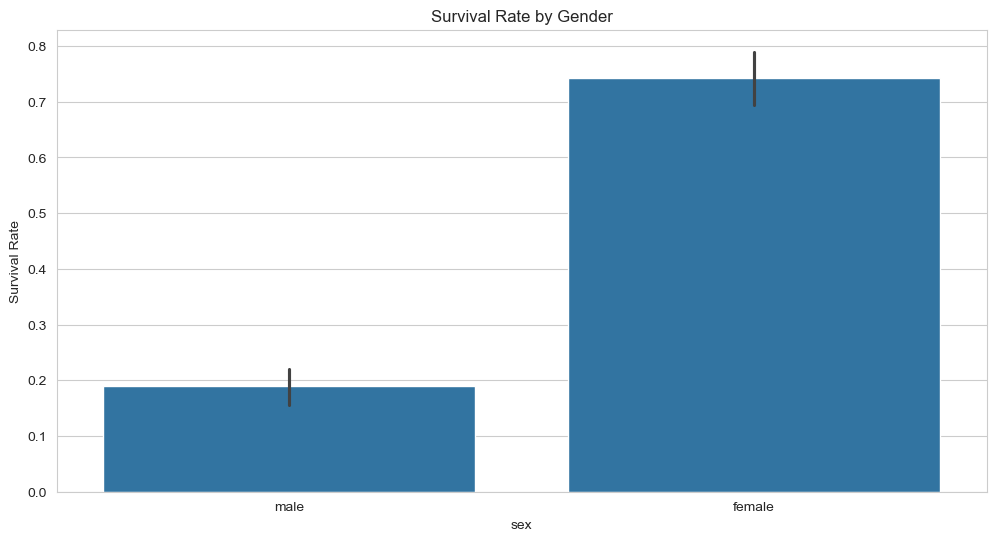

In [12]:
sns.barplot(data=df, x='sex', y='survived')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()


### 5.2 Survival by Passenger Class

In [13]:
pd.crosstab(df['pclass'], df['survived'], normalize='index') * 100

survived,0,1
pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


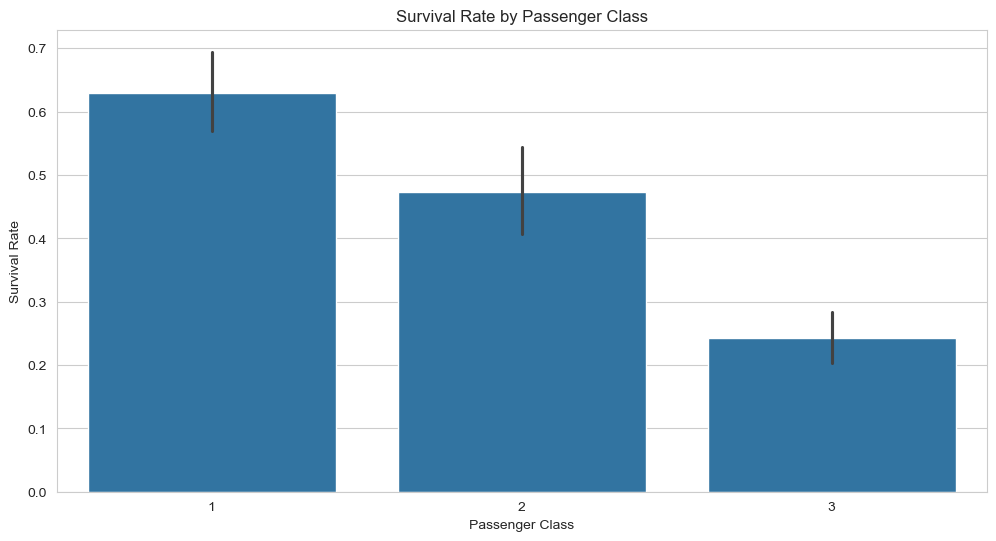

In [14]:
sns.barplot(data=df, x='pclass', y='survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


### 5.3 Age Distribution

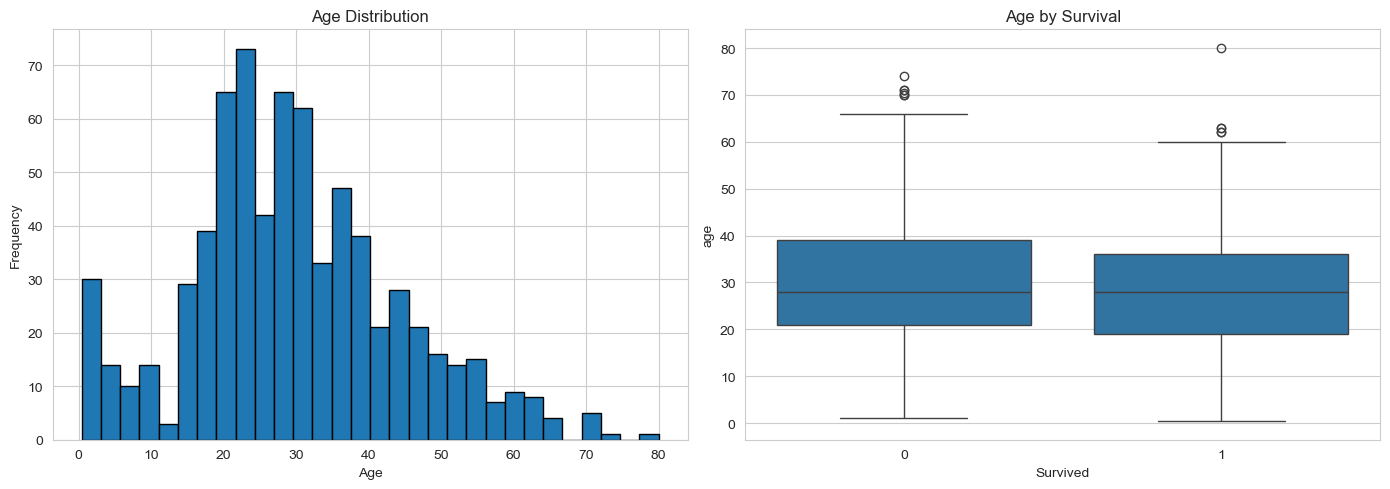

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['age'].dropna(), bins=30, edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

df_age = df.dropna(subset=['age'])
sns.boxplot(data=df_age, x='survived', y='age', ax=axes[1])
axes[1].set_title('Age by Survival')
axes[1].set_xlabel('Survived')

plt.tight_layout()
plt.show()


### 5.4 Fare Analysis

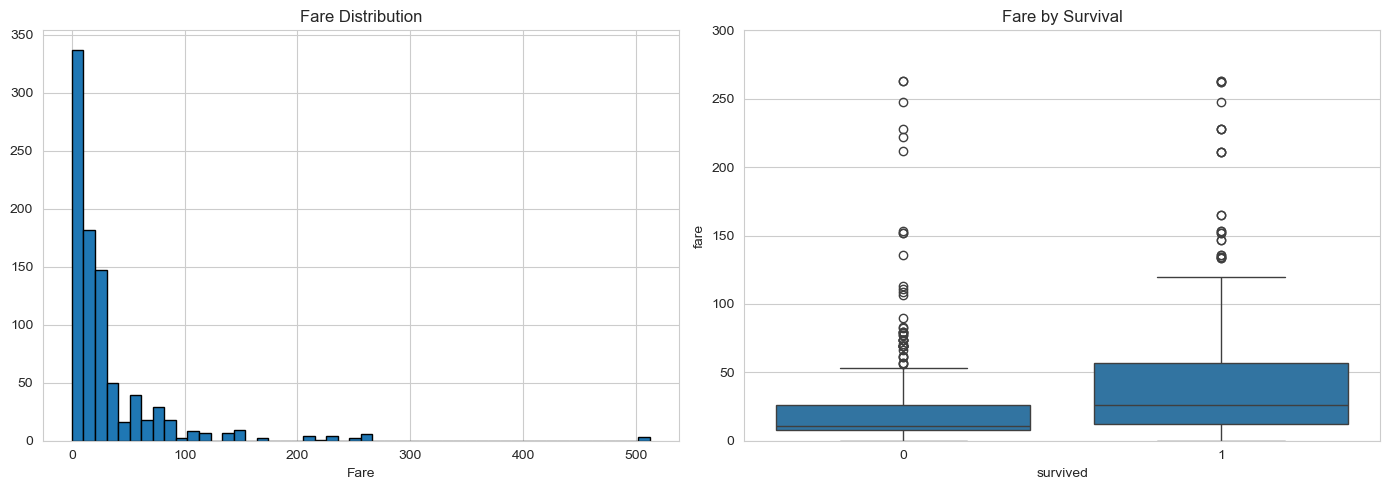

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['fare'], bins=50, edgecolor='black')
axes[0].set_title('Fare Distribution')
axes[0].set_xlabel('Fare')

sns.boxplot(data=df, x='survived', y='fare', ax=axes[1])
axes[1].set_title('Fare by Survival')
axes[1].set_ylim(0, 300)

plt.tight_layout()
plt.show()


### 5.5 Family Size Analysis

In [17]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df.groupby('family_size')['survived'].mean()


family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64

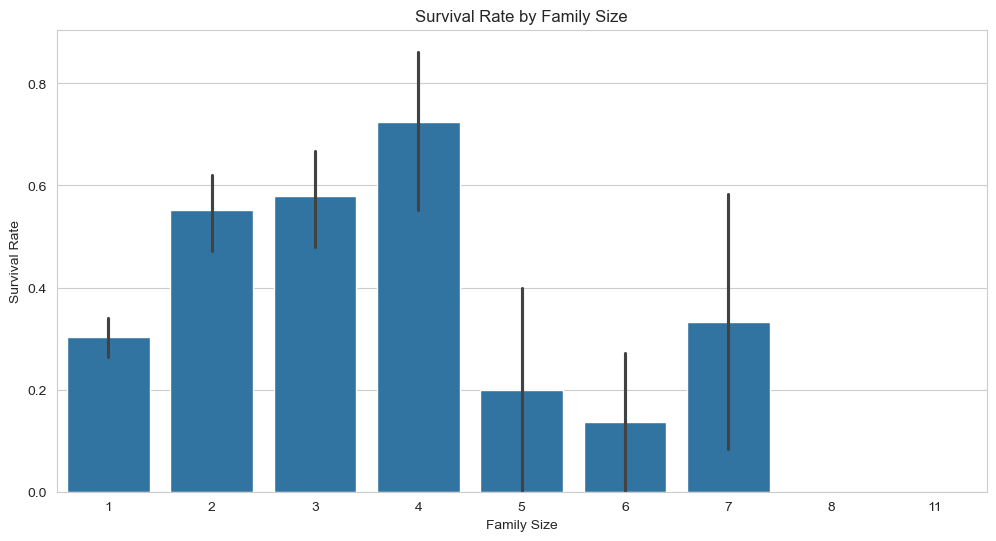

In [18]:
sns.barplot(data=df, x='family_size', y='survived')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


### 5.6 Embarkation Point

In [19]:
pd.crosstab(df['embarked'], df['survived'], normalize='index') * 100

survived,0,1
embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


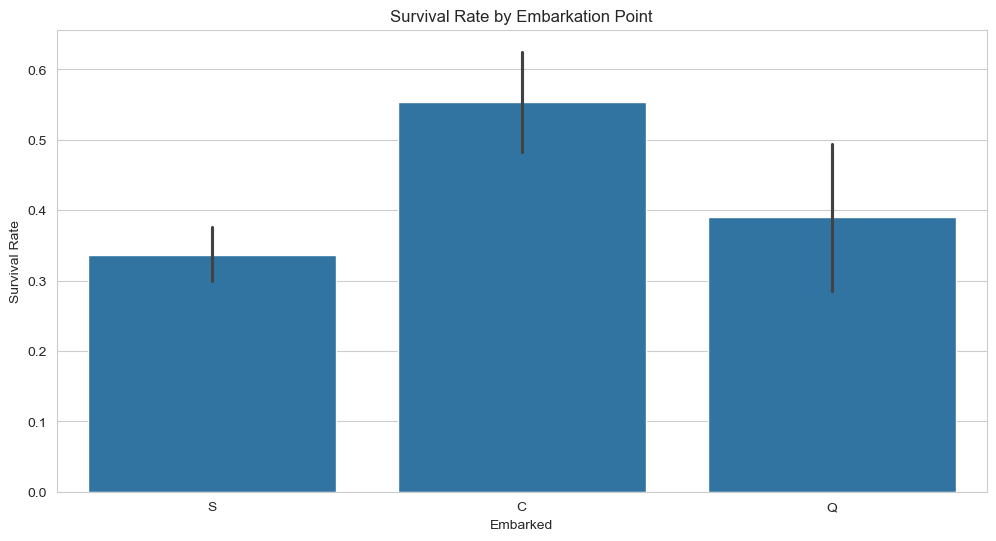

In [20]:
sns.barplot(
    data=df.dropna(subset=['embarked']),
    x='embarked',
    y='survived'
)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()


## 6. Correlation Analysis

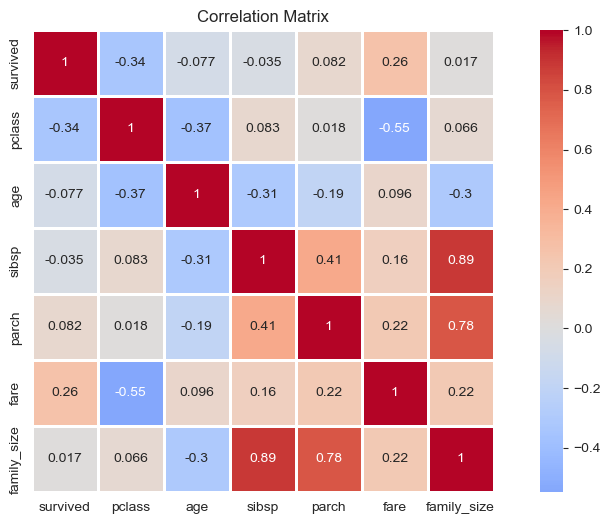

In [21]:
numerical_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'family_size']
corr_df = df[numerical_cols].corr()

sns.heatmap(
    corr_df,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1
)
plt.title('Correlation Matrix')
plt.show()


## 7. Multi-Feature Analysis

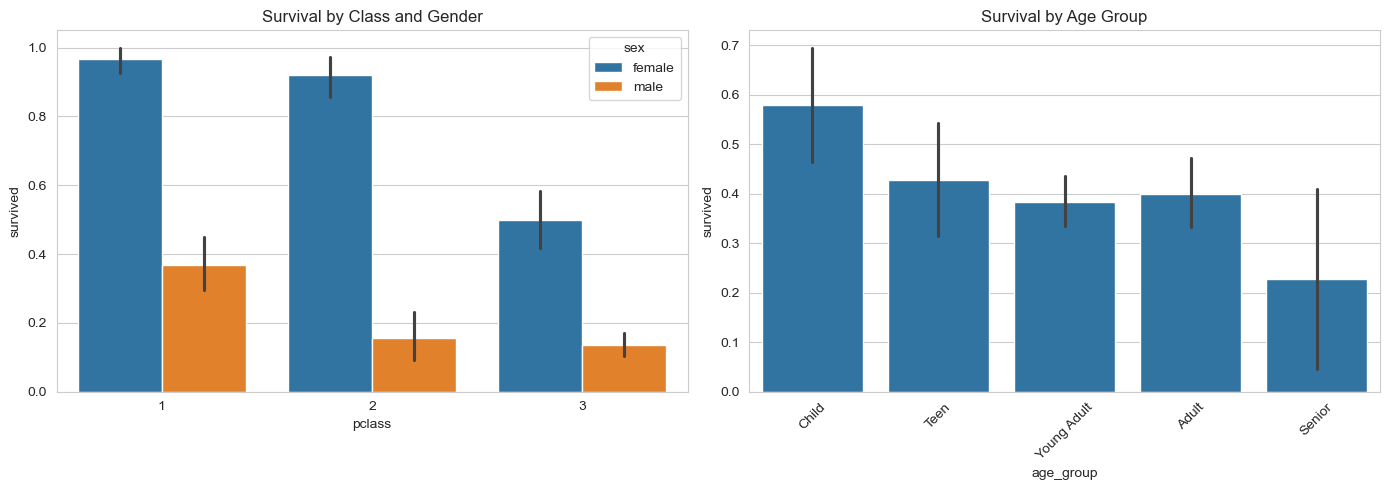

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(
    data=df,
    x='pclass',
    y='survived',
    hue='sex',
    ax=axes[0]
)
axes[0].set_title('Survival by Class and Gender')

df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
)

sns.barplot(
    data=df.dropna(subset=['age_group']),
    x='age_group',
    y='survived',
    ax=axes[1]
)
axes[1].set_title('Survival by Age Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 8. Key Insights Summary

In [23]:
summary = {
    "Overall Survival Rate (%)": df['survived'].mean() * 100,
    "Female Survival Rate (%)": df[df['sex'] == 'female']['survived'].mean() * 100,
    "Male Survival Rate (%)": df[df['sex'] == 'male']['survived'].mean() * 100,
    "1st Class Survival Rate (%)": df[df['pclass'] == 1]['survived'].mean() * 100,
    "3rd Class Survival Rate (%)": df[df['pclass'] == 3]['survived'].mean() * 100,
    "Average Age": df['age'].mean(),
    "Missing Age (%)": df['age'].isnull().mean() * 100,
    "Family Size Range": f"{df['family_size'].min()}–{df['family_size'].max()}"
}

pd.Series(summary)


Overall Survival Rate (%)      38.383838
Female Survival Rate (%)       74.203822
Male Survival Rate (%)         18.890815
1st Class Survival Rate (%)    62.962963
3rd Class Survival Rate (%)    24.236253
Average Age                    29.699118
Missing Age (%)                 19.86532
Family Size Range                   1–11
dtype: object